In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cxroots

In [2]:
%matplotlib inline

In [3]:
import xwglib as tmm

In [4]:
materials = {
    'Si' : tmm.XRLMaterial(formula='Si', color='grey', density=2.329),
    'Mo': tmm.XRLMaterial(formula='Mo', color='blue', density=10.2),
    'B4C' : tmm.XRLMaterial(formula='B4C',color='yellow', density=2.520),
    'Fe' : tmm.XRLMaterial(formula='Fe', color='red', density=7.874),
    'Air' : tmm.ConstMaterial(name='Air', color='white', index=1.0),
    
}

In [5]:
energy = 8.04

inner_layers = (
    tmm.Layer(materials['B4C'], 10),
    tmm.Layer(materials['Fe'], 30),
)
layerstack = tmm.LayerStack(materials['Air'], 
                        inner_layers, 
                        materials['Si'] )

In [6]:
# use the outgoing branch cut to avoid evaluating on the branch cut of air

s = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.outgoing)
s_rough1 = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.outgoing)
s_rough2 = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.outgoing)
s_rough3 = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.outgoing)

s_rough1.sigma = np.asarray([0.5, 0, 0])
s_rough2.sigma = np.asarray([0, 0.5, 0])
s_rough3.sigma = np.asarray([0, 0, 0.5])

In [7]:
th = np.linspace(0, 3, 1000)
th_rad = np.deg2rad(th)


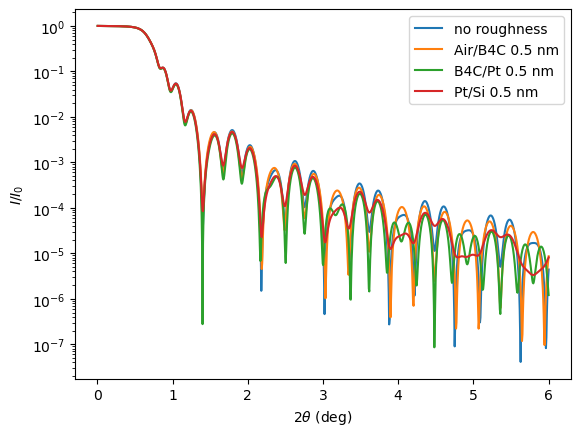

In [8]:
fig, ax = plt.subplots()
ax.semilogy(2 * th, np.abs(s.reflectivity_te(th_rad))**2, label='no roughness')
ax.semilogy(2 * th, np.abs(s_rough1.reflectivity_te(th_rad))**2, label='Air/B4C 0.5 nm')
ax.semilogy(2 * th, np.abs(s_rough2.reflectivity_te(th_rad))**2, label='B4C/Pt 0.5 nm')
ax.semilogy(2 * th, np.abs(s_rough3.reflectivity_te(th_rad))**2, label='Pt/Si 0.5 nm')

ax.set_xlabel(r'$2 \theta$ (deg)')
ax.set_ylabel(r'$I / I_0$')
ax.legend()

In [9]:
#data_no = np.stack([2 * th, np.abs(s.model.reflectivity_te(th_rad))**2])
#np.savetxt('reflectivity_no.dat', data_no.T)
#data_rough3 = np.stack([2 * th, np.abs(s_rough3.model.reflectivity_te(th_rad))**2])
#np.savetxt('reflectivity_rough3.dat', data_rough3.T)


# waveguide structure

In [10]:
inner_layers = (
    tmm.Layer(materials['Mo'], 8),
    tmm.Layer(materials['B4C'], 40),
)

layerstack = tmm.LayerStack(materials['Air'], 
                            inner_layers, 
                            materials['Mo'] )

In [11]:
s = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.outgoing)
s_rough = tmm.Model(*layerstack.get_parameters(energy=energy), method='fourier', branch=tmm.BranchCut.outgoing)
s_rough.sigma = np.asarray([0, 1, 1])


In [12]:
th = np.linspace(0, 0.6, 1000)
th_rad = np.deg2rad(th)


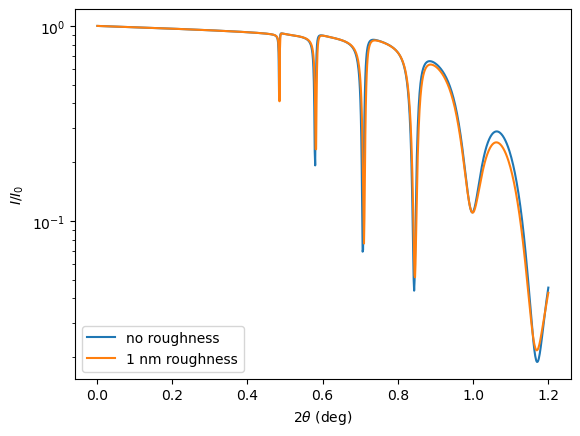

In [14]:
fig, ax = plt.subplots()
ax.semilogy(2 * th, np.abs(s.reflectivity_te(th_rad))**2, label='no roughness')
ax.semilogy(2 * th, np.abs(s_rough.reflectivity_te(th_rad))**2, label='1 nm roughness')

ax.set_xlabel(r'$2 \theta$ (deg)')
ax.set_ylabel(r'$I / I_0$')
ax.legend()

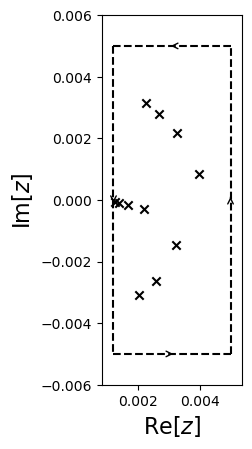

0 356 um, 0.2423 deg
1 97 um, 0.2901 deg
2 36 um, 0.3539 deg
3 14 um, 0.4221 deg


In [15]:
m_conf = tmm.Model(*layerstack.get_parameters(energy=energy), method='conformal')
s_conf = tmm.Modefinder(m_conf)

contour = cxroots.Rectangle((1.2e-3, 5e-3), (-5e-3, 5e-3))
#contour = cxroots.Annulus(center=0, radii=(1.2e-3, 6.3e-3))

result, rootresult = s_conf.find_modes(contour)
rootresult.show()

for j, ind in enumerate(result.indices_leaky_neg.compressed()):
    print(f'{j} {tmm.attenuation_length(ind, energy) * 1e-3:.0f} um, {np.rad2deg(np.arccos(np.real(ind))):.4f} deg')

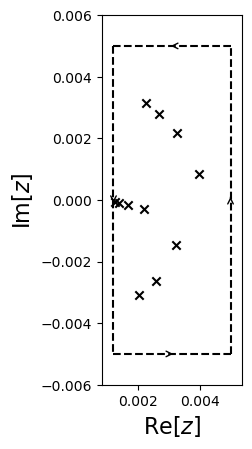

0 356 um, 0.2423 deg
1 97 um, 0.2901 deg
2 36 um, 0.3539 deg
3 14 um, 0.4221 deg


In [17]:
m_conf_rough = tmm.Model(*layerstack.get_parameters(energy=energy), method='conformal')
s_conf_rough = tmm.Modefinder(m_conf_rough)
s_conf_rough.sigma = np.asarray([0, 1, 1])

result, rootresult = s_conf_rough.find_modes(contour)
rootresult.show()

for j, ind in enumerate(result.indices_leaky_neg.compressed()):
    print(f'{j} {tmm.attenuation_length(ind, energy) * 1e-3:.0f} um, {np.rad2deg(np.arccos(np.real(ind))):.4f} deg')